# DAY 1

## Task 1

In [1]:
from typing import Tuple

In [2]:
count = 0
with open('Day_1_data/input.txt') as fp:
    for line in fp:
        digit_list = [x for x in line if x.isdigit()]
        count+=int(digit_list[0] + digit_list[-1])
print(count)

55834


## Task 2

In [3]:
digit_map = {'one': '1',
             'two' : '2', 
             'three' : '3', 
             'four' : '4', 
             'five' : '5', 
             'six' : '6', 
             'seven' : '7', 
             'eight' : '8',
             'nine' : '9' 
            }

In [4]:
def check_and_replace(string: str) -> Tuple[str, bool]:
    input_string = string
    for key in digit_map.keys():
        string = string.replace(key, digit_map[key])
    return string, input_string==string

In [5]:
def replace_to_digits(string: str) -> str:
    digit = ''
    len_str = len(string)
    for i in range(len_str):
        if string[i].isdigit():
            digit = string[i]
            break
        else:
            new_str, flag = check_and_replace(string[:i + 1])
            if not flag:
                digit = new_str[-1]
                break

    return digit

In [6]:
def replace_to_digits_rev(string: str) -> str:
    digit = ''
    len_str = len(string)
    for i in range(len_str):
        if string[-i - 1].isdigit():
            digit = string[-i - 1]
            break
        else:
            new_str, flag = check_and_replace(string[-i - 1:])
            if not flag:
                digit = new_str[0]
                break

    return digit

In [7]:
list_out = []
count = 0
with open('Day_1_data/input.txt') as fp:
    for line in fp:
        list_out.append(
            int(replace_to_digits(line) + replace_to_digits_rev(line)))
        count += int(replace_to_digits(line) + replace_to_digits_rev(line))
print(count)

53221


# Day 2

## Task 1

In [8]:
import pandas as pd

In [9]:
game_1_red = pd.Series()
game_1_blue = pd.Series()
game_1_green = pd.Series()

game_2_red = pd.Series()
game_2_blue = pd.Series()
game_2_green = pd.Series()

game_3_red = pd.Series()
game_3_blue = pd.Series()
game_3_green = pd.Series()

with open('Day_2_data/input.txt') as fp:
    for line in fp:
        split_1 = line.split(':')
        split_2 = split_1[1].split(';')
        game_index = int(split_1[0].split(' ')[-1])
        k=0
        for i in split_2:
            split_3 = i.split(',')
            k = k+1
            for j in split_3:
                jj = j.split(' ')
                val_color = jj[-1]
                val = int(jj[-2])
                if k==1 and val_color=='red':
                    game_1_red.at[game_index] = val
                elif k==1 and val_color=='blue':
                    game_1_blue.at[game_index] = val
                elif k==1 and val_color=='green':
                    game_1_green.at[game_index] = val
                elif k==2 and val_color=='red':
                    game_2_red.at[game_index] = val
                elif k==2 and val_color=='blue':
                    game_2_blue.at[game_index] = val
                elif k==2 and val_color=='green':
                    game_2_green.at[game_index] = val
                if k==3 and val_color=='red':
                    game_3_red.at[game_index] = val
                elif k==3 and val_color=='blue':
                    game_3_blue.at[game_index] = val
                elif k==3 and val_color=='green':
                    game_3_green.at[game_index] = int(val)


In [10]:
frame = {
    'game_1_red': game_1_red,
    'game_1_green': game_1_green,
    'game_1_blue': game_1_blue,
    'game_2_red': game_2_red,
    'game_2_green': game_2_green,
    'game_2_blue': game_2_blue,
    'game_3_red': game_3_red,
    'game_3_green': game_3_green,
    'game_3_blue': game_3_blue
}

df = pd.DataFrame(frame)
df.fillna(0, inplace=True)

red_limit = 12
green_limit = 13
blue_limit = 14

df = df.apply(pd.to_numeric)

In [11]:
df = df.apply(pd.to_numeric)

In [12]:
df.head()

,game_1_red,game_1_green,game_1_blue,game_2_red,game_2_green,game_2_blue,game_3_red,game_3_green,game_3_blue
1,0.0,1.0,2.0,12.0,2.0,15.0,4.0,0.0,6.0
2,2.0,5.0,18.0,6.0,9.0,18.0,0.0,3.0,6.0
3,16.0,10.0,0.0,12.0,9.0,6.0,0.0,10.0,5.0
4,0.0,20.0,9.0,1.0,10.0,3.0,0.0,18.0,7.0
5,8.0,3.0,0.0,10.0,0.0,1.0,6.0,4.0,0.0


In [13]:
red_condition = (df[['game_1_red', 'game_2_red', 'game_3_red']] <= red_limit).all(1)
green_condition = (df[['game_1_green', 'game_2_green', 'game_3_green']] <= green_limit).all(1)
blue_condition = (df[['game_1_blue', 'game_2_blue', 'game_3_blue']] <= blue_limit).all(1)

filtered_indices = df[red_condition & green_condition & blue_condition].index
total = sum(filtered_indices)

In [14]:
total

3105

## Task 2

In [17]:
count = 0
with open('Day_2_data/input.txt') as fp:
    for line in fp:
        split_1 = line.split(':')
        split_2 = split_1[1].split(';')
        game_index = int(split_1[0].split(' ')[-1])
        max_red = 1
        max_green = 1
        max_blue = 1
        power = 1
        for i in split_2:
            split_3 = i.split(',')
            k = k+1
            for j in split_3:
                jj = j.split(' ')
                val_color = jj[-1].replace('\n', '')
                val = int(jj[-2].strip())
                if (val_color == 'red'):
                    max_red = max(max_red, val)
                elif (val_color == 'green'):
                    max_green = max(max_green, val)
                elif (val_color == 'blue'):
                    max_blue = max(max_blue, val)
                else:
                    pass
        #print(max_red, max_green, max_blue)
        power = max_red * max_green * max_blue
        count += power

In [18]:
count

55593

# Day 3

## Task 1 

In [19]:
import re
from typing import List

In [20]:
def search_symbol_positions(string: str) -> List[int]:
    pos_list = []
    for i in range(len(string)):
        if (string[i] != '.') & (not string[i].isdigit()):
            pos_list.append(i)
    return pos_list

In [21]:
def search_numbers(string_1: str, string_2: str, string_3: str) -> int:
    sum_in_string = 0
    symbol_positions = search_symbol_positions(string_1) + \
                        search_symbol_positions(string_2) + \
                        search_symbol_positions(string_3)
    #drop duplicates
    symbol_positions = list(set(symbol_positions))
    symbol_positions.sort()
    #search numbers in string 2
    rep_str = re.sub("[^0-9]", " ", string_2)
    num_list = rep_str.split(' ')
    num_list = [i for i in num_list if i.isdigit()]
    for num in num_list:
        start_position = string_2.find(num)
        number_len = len(num)
        for idx in symbol_positions:
            if (idx >= (start_position - 1)) & (idx <= (start_position + number_len)):
                sum_in_string+=int(num)
                break
        string_2 = string_2.replace(num, '.'*number_len, 1)
    return sum_in_string

In [22]:
count = 0
string_1 = '.'
string_2 = '.'
string_3 = '.'
with open('Day_3_data/input_nastya.txt') as fp:
    for line in fp:
        line = line.replace('\n', '')
        string_1 = string_2
        string_2 = string_3
        string_3 = line
        line_sum = search_numbers(string_1, string_2, string_3)
        count+=line_sum
    count+=search_numbers(string_2, string_3, '.')
print(count)

520135


## Task 2

In [23]:
from typing import List, Tuple

In [24]:
def search_asterisk_positions(string: str) -> List[int]:
    pos_list = []
    for i in range(len(string)):
        if (string[i] == '*'):
            pos_list.append(i)
    return pos_list

In [25]:
def search_number_positions(string_num: str) -> List[Tuple[int, Tuple[int, int]]]:
    dic_pos = []
    rep_str = re.sub("[^0-9]", " ", string_num)
    num_list = rep_str.split(' ')
    num_list = [i for i in num_list if i.isdigit()]
    for num in num_list:
        number_len = len(num)
        start_position = string_num.find(num)
        string_num = string_num.replace(num, '.'*number_len, 1)
        dic_pos.append([int(num), [start_position, start_position+number_len-1]])
    return dic_pos

In [23]:
count = 0
string_1 = '.'
string_2 = '.'
string_3 = '.'
with open('Day_3_data/input.txt') as fp:
    for line in fp:
        number_list = []
        line = line.replace('\n', '')
        string_1 = string_2
        string_2 = string_3
        string_3 = line
        num_pos = []
        prod_numbers = 0
        if search_number_positions(string_1):
            num_pos.append(search_number_positions(string_1))
        if search_number_positions(string_2):
            num_pos.append(search_number_positions(string_2))
        if search_number_positions(string_3):
            num_pos.append(search_number_positions(string_3))
        flat_num_pos = [item for sublist in num_pos for item in sublist]
        asterisk_pos = search_asterisk_positions(string_2)
        for ast in asterisk_pos:
            number_list = []
            prod_numbers=0
            for i in flat_num_pos:
                if (ast>=i[1][0]-1) and (ast<=i[1][1]+1):
                    number_list.append(i[0])
            
            if len(number_list)==2:
                prod_numbers = number_list[0]*number_list[1]
            count+=prod_numbers
print(count)
    

72514855


# Day 4

## Task 1


In [26]:
def list_intersection(lst1: List[int], lst2: List[int]) -> List[int]:
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [27]:
count = 0
with open('Day_4_data/input.txt') as fp:
    for line in fp:
        interseptopns = 0
        line = ' '.join(line.split())
        subs = line.split('|')
        win_num = subs[0].split(':')[1].strip().split(' ')
        my_num = subs[1].split(':')[0].strip().split(' ')
        interseptopns = list_intersection(win_num, my_num)
        if  len(interseptopns) >= 1:
            count+=(2**(len(interseptopns)-1))
        else:
            continue
print('COUNT: ', count)

COUNT:  28750


 ## Task 2

In [28]:
count = 0
game_dic = {}
with open('Day_4_data/input_2.txt') as fp:
    for line in fp:
        interseptopns = 0
        line = ' '.join(line.split())
        subs = line.split('|')
        game_num = int(subs[0].split(':')[0].split(' ')[1])
        win_num = subs[0].split(':')[1].strip().split(' ')
        my_num = subs[1].split(':')[0].strip().split(' ')
        interseptopns = list_intersection(win_num, my_num)
        game_dic[game_num] = len(interseptopns)
        if  len(interseptopns) >= 1:
            count+=(2**(len(interseptopns)-1))
        else:
            continue
print('COUNT: ', count)

COUNT:  28750


In [29]:
dic_copies = {}
for k,v in game_dic.items():
      dic_copies[k] = 1 
        
for k,v in game_dic.items():
    for i in range(0, v):
        if (i+k+1) <= list(dic_copies)[-1]:
            dic_copies[i+k+1] += dic_copies[k]
        else:
            pass

In [30]:
sum(dic_copies.values())

10212704

# Day 5

## Task 1

In [31]:
import itertools
from typing import Dict, List, Tuple

In [32]:
names_list = open('Day_5_data/input.txt', "r").read().split('\n')

In [33]:
list_group =  [[list(g)] for m, g in itertools.groupby(names_list, key=lambda x: x!='') if m]
list_group = list(itertools.chain.from_iterable(list_group))
list_of_maps = list_group[1:]

seed_numbers = list_group[0][0].split(':')[1].strip().split(' ')
seed_numbers = list(map(int, seed_numbers))
seed_dictionary = dict(zip(seed_numbers, seed_numbers))

In [34]:
#[print(i, '\n\n') for i in list_of_maps]

In [35]:
def seed_decoder(seed_num: int, seed_maps: Dict[int, int]) -> int:
    for i in seed_maps:
        map_line = i.split(' ')
        map_line = list(map(int, map_line))
        #print(seed_num)
        #print(map_line)
        if (seed_num >= map_line[1]) & (seed_num <= map_line[1] + map_line[2]):
            map_delta =  map_line[0] - map_line[1]
            return (seed_num + map_delta)
        else:
            continue
    return seed_num

In [36]:
for maps in list_of_maps:
    current_map = maps[1:]
    for key, val in seed_dictionary.items():
        decode_seed = seed_decoder(val, current_map)
        seed_dictionary[key] = decode_seed

In [38]:
min(seed_dictionary.values())

309796150

# Day 6

## Task 1

In [40]:
import numpy

In [41]:
input_data = open('Day_6_data/test_1.txt', "r").read().split('\n')

In [42]:
time_list = [' '.join(i.split()) for i in input_data[0].split(':')[1:]]
time_list = list(map(int,time_list[0].split(' ')))
dist_list = [' '.join(i.split()) for i in input_data[1].split(':')[1:]]
dist_list = list(map(int,dist_list[0].split(' ')))
print(time_list)
print(dist_list)

[7, 15, 30]
[9, 40, 200]


In [43]:
win_list=[]
for i in range(len(time_list)):
    win_comb = 0
    for j in range(time_list[i]+1):
        if (j*(time_list[i]-j)) > dist_list[i]:
            win_comb+=1
    win_list.append(win_comb)

In [44]:
np.prod(win_list)

288

## Task 2

In [45]:
input_data = open('Day_6_data/input.txt', "r").read().split('\n')

In [46]:
input_data[0].replace(' ', '').split(':')[1:]

['59796575']

In [47]:
time_list = input_data[0].replace(' ', '').split(':')[1:]
time = int(time_list[0])
dist_list = input_data[1].replace(' ', '').split(':')[1:]
dist = int(dist_list[0])
print(time)
print(dist)

59796575
597123410321328


In [48]:
win_list=[]
win_comb=0
for j in range(time+1):
    #print(j, time-j, j*(time-j))
    if (j*(time-j)) > dist:
        win_comb+=1
print(win_comb)

34454850


# Day 7

## Task 1

In [49]:
from collections import Counter
import pandas as pd

In [50]:
input_data = open('Day_7_data/input.txt', "r").read().split('\n')

In [51]:
len(input_data)

1000

In [52]:
cards = pd.Series()
bid = pd.Series()

In [54]:
cards = []
bid = []

for i, hand in enumerate(input_data):
    val = hand.split(' ')
    cards.append(val[0])
    bid.append(int(val[1]))  

In [55]:
df = pd.DataFrame(list(zip(cards, bid)), columns =['cards', 'bid'])

In [56]:
def counter_dic(string: str) -> List[int]:
    val_list = list(Counter(list(string)).values())
    return sorted(val_list, reverse=True)

In [57]:
def first_lvl_rank(rank_list: List[int]):
    if (rank_list == [5]):
        return 6
    elif (rank_list == [4, 1]):
        return 5
    elif (rank_list == [3, 2]):
        return 4
    elif (rank_list == [3, 1, 1]):
        return 3
    elif (rank_list == [2, 2, 1]):
        return 2
    elif (rank_list == [2, 1, 1, 1]):
        return 1
    elif (rank_list == [1, 1, 1, 1, 1]):
        return 0

In [59]:
def card_replace(card: str) -> int:
    if card=='T':
        return 10
    elif card=='J':
        return 11
    elif card=='Q':
        return 12
    elif card=='K':
        return 13
    elif card=='A':
        return 14
    else:
        return int(card)

In [60]:
df['combination'] = df.cards.apply(counter_dic)
df['first_lvl_rank'] = df.combination.apply(first_lvl_rank)

In [61]:
cards_df = pd.DataFrame(df.cards.apply(list).tolist())
cards_df.columns = ['card_1', 'card_2', 'card_3', 'card_4', 'card_5']
cards_df = cards_df.applymap(card_replace)

In [62]:
df = pd.concat([df, cards_df], axis=1)


In [64]:
df.head()

,cards,bid,combination,first_lvl_rank,card_1,card_2,card_3,card_4,card_5
0,QTTQK,749,"[2, 2, 1]",2,12,10,10,12,13
1,JQAA2,148,"[2, 1, 1, 1]",1,11,12,14,14,2
2,37J44,319,"[2, 1, 1, 1]",1,3,7,11,4,4
3,559J5,647,"[3, 1, 1]",3,5,5,9,11,5
4,92992,659,"[3, 2]",4,9,2,9,9,2


In [65]:
df = df.sort_values(['first_lvl_rank', 'card_1', 'card_2', 'card_3', 'card_4', 'card_5']).reset_index()

In [66]:
sum((df.index + 1)*df.bid)

256448566

## Task 2

In [67]:
from collections import Counter
import pandas as pd

In [68]:
input_data = open('Day_7_data/input.txt', "r").read().split('\n')

In [69]:
cards = []
bid = []

for i, hand in enumerate(input_data):
    val = hand.split(' ')
    cards.append(val[0])
    bid.append(int(val[1]))  

In [70]:
df = pd.DataFrame(list(zip(cards, bid)), columns =['cards', 'bid'])

In [71]:
def joker_replace(string: str) -> str:
    string_without_J = string.replace('J', '')
    if string_without_J:
        val_list = list(Counter(list(string_without_J)).values())
        card_list = list(Counter(list(string_without_J)).keys())
        max_idx = val_list.index(max(val_list))
        best_card = card_list[max_idx]
        return string.replace('J', best_card)
    else:
        return 'AAAAA'

In [72]:
df['new_cards'] = df.cards.apply(joker_replace)

In [73]:
def card_replace(card: str) -> int:
    if card=='T':
        return 10
    elif card=='J':
        return 0
    elif card=='Q':
        return 12
    elif card=='K':
        return 13
    elif card=='A':
        return 14
    else:
        return int(card)

In [74]:
def counter_dic(string: str) -> List[int]:
    val_list = list(Counter(list(string)).values())
    return sorted(val_list, reverse=True)

In [75]:
def first_lvl_rank(rank_list: List[int]) -> int:
    if (rank_list == [5]):
        return 6
    elif (rank_list == [4, 1]):
        return 5
    elif (rank_list == [3, 2]):
        return 4
    elif (rank_list == [3, 1, 1]):
        return 3
    elif (rank_list == [2, 2, 1]):
        return 2
    elif (rank_list == [2, 1, 1, 1]):
        return 1
    elif (rank_list == [1, 1, 1, 1, 1]):
        return 0

In [76]:
df['combination'] = df.new_cards.apply(counter_dic)
df['first_lvl_rank'] = df.combination.apply(first_lvl_rank)

In [77]:
cards_df = pd.DataFrame(df.cards.apply(list).tolist())
cards_df.columns = ['card_1', 'card_2', 'card_3', 'card_4', 'card_5']
cards_df = cards_df.applymap(card_replace)

In [78]:
df = pd.concat([df, cards_df], axis=1)

In [80]:
df.head()

,cards,bid,new_cards,combination,first_lvl_rank,card_1,card_2,card_3,card_4,card_5
0,QTTQK,749,QTTQK,"[2, 2, 1]",2,12,10,10,12,13
1,JQAA2,148,AQAA2,"[3, 1, 1]",3,0,12,14,14,2
2,37J44,319,37444,"[3, 1, 1]",3,3,7,0,4,4
3,559J5,647,55955,"[4, 1]",5,5,5,9,0,5
4,92992,659,92992,"[3, 2]",4,9,2,9,9,2


In [81]:
df = df.sort_values(['first_lvl_rank', 'card_1', 'card_2', 'card_3', 'card_4', 'card_5']).reset_index()

In [82]:
sum((df.index + 1)*df.bid)

254412181

# Day 8

## Task 1

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from typing import Tuple

In [2]:
input_data = open('Day_8_data/input.txt', "r").read().split('\n')

In [3]:
route = input_data[0]
graph = input_data[2:]

In [5]:
graph[:2]

['GXT = (MQM, CHN)', 'MBK = (RCK, RCK)']

In [6]:
nodes = [i.split('(')[0][:-3] for i in graph]
child_nodes = [i.split('(')[1][:-1] for i in graph]

In [7]:
g = nx.Graph()
g_dic = {}
for i, node in enumerate(child_nodes):
    l, r = node.split(',')
    g.add_edge(nodes[i], l.strip())
    g.add_edge(nodes[i], r.strip())   
    g_dic[nodes[i]] = [l.strip(), r.strip()]

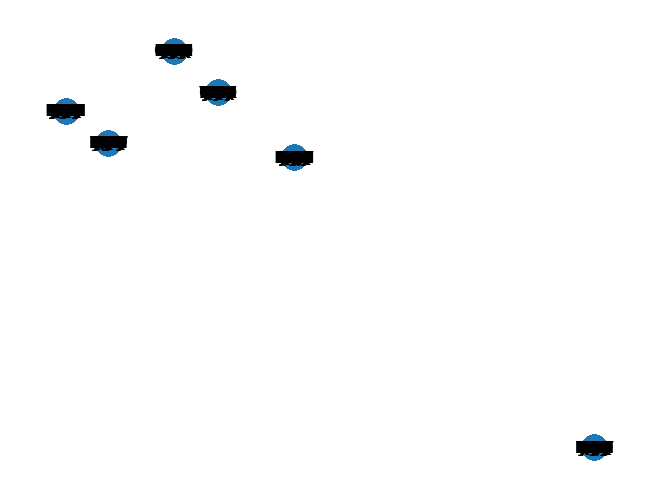

In [8]:
nx.draw_spectral(g, with_labels = True)
plt.savefig("filename2.png")

C:\Users\Me\AppData\Local\Temp\ipykernel_15988\3800553968.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(g, prog="twopi")


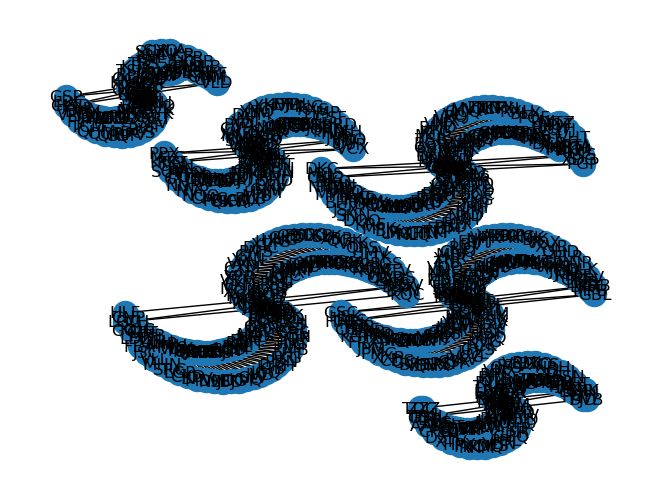

In [9]:
pos = graphviz_layout(g, prog="twopi")
nx.draw(g, pos, with_labels = True)
plt.show()

In [10]:
g_dic['AAA'][1]

'CFC'

In [13]:
def get_node(direction: str, node: str) -> str:
    if direction=='L':
        return g_dic[node][0]
    else:
        return g_dic[node][1]

In [17]:
def route_walk(count: int, current_node: str) -> Tuple[int, str]:
    for r_d in route:
        count+=1
        next_node = get_node(r_d, current_node)
        if next_node == 'ZZZ':
            return count, next_node
        else:
            current_node = next_node
    return count, next_node
        

In [18]:
route_walk(1, 'AAA')

(282, 'TDG')

In [19]:
count=0
end_point = 'AAA'
while (end_point != 'ZZZ'):
    count, end_point = route_walk(count, end_point)

In [20]:
end_point

'ZZZ'

In [21]:
count

13207

## Task 2

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
from math import gcd
from typing import List

In [23]:
input_data = open('Day_8_data/input.txt', "r").read().split('\n')

In [24]:
route = input_data[0]
graph = input_data[2:]

nodes = [i.split('(')[0][:-3] for i in graph]
child_nodes = [i.split('(')[1][:-1] for i in graph]

g_dic = {}
for i, node in enumerate(child_nodes):
    l, r = node.split(',') 
    g_dic[nodes[i]] = [l.strip(), r.strip()]

In [25]:
def get_node(direction: str, node: str) -> str:
    if direction=='L':
        return g_dic[node][0]
    else:
        return g_dic[node][1]

In [26]:
def route_walk(count: int, current_node: str) -> Tuple[int, str]:
    for r_d in route:
        count+=1
        next_node = get_node(r_d, current_node)
        if next_node[-1:]=='Z':
            return count, next_node
        else:
            current_node = next_node
    #print(count, next_node)
    return count, next_node
        

In [27]:
list_of_starts = [i for i in g_dic if i[-1:] == 'A']

In [28]:
list_of_starts

['AAA', 'PRA', 'PVA', 'XLA', 'PTA', 'FBA']

In [29]:
count=0
end_point = 'PRA'
result_list = []
for start in list_of_starts:
    end_point = start
    count = 0
    while (end_point[-1:] != 'Z'):
        count, end_point = route_walk(count, end_point)
    #print(count, end_point)
    result_list.append(count)

In [30]:
result_list

[13207, 19951, 14893, 12083, 20513, 22199]

In [31]:
x = np.lcm.reduce(result_list)

In [32]:
x

1104728649

In [33]:
lcm = 1
for i in result_list:
    lcm = lcm*i//gcd(lcm, i)
print(lcm)

12324145107121


# Day 9

In [48]:
input_data = open('Day_9_data/input.txt', "r").read().split('\n')

In [49]:
input_data

['10 15 15 10 0 -15 -35 -60 -90 -125 -165 -210 -260 -315 -375 -440 -510 -585 -665 -750 -840',
 '4 0 4 37 137 373 875 1885 3829 7404 13667 24105 40656 65641 101556 150661 214290 291792 378998 466093 534755',
 '5 14 35 70 124 218 428 968 2337 5554 12525 26654 53986 105566 202537 387238 747109 1465286 2925459 5924110 12089144',
 '3 0 -7 -18 -33 -52 -75 -102 -133 -168 -207 -250 -297 -348 -403 -462 -525 -592 -663 -738 -817',
 '8 11 11 15 49 169 480 1180 2661 5723 11997 24738 50264 100559 198135 385661 746225 1447698 2841038 5675992 11563810',
 '4 5 8 11 23 75 228 590 1366 2981 6341 13334 27729 56736 113748 223498 432804 835074 1628856 3258428 6744587',
 '15 37 66 105 171 312 630 1308 2652 5183 9850 18489 34736 65730 125136 238304 450789 842025 1546714 2787505 4923849',
 '11 14 19 32 70 163 356 711 1309 2252 3665 5698 8528 12361 17434 24017 32415 42970 56063 72116 91594',
 '10 11 18 43 101 208 380 633 980 1429 2016 2969 5221 11764 31003 84858 227915 591377 1480393 3581719 8391418',
 '10 11 1

In [50]:
def rec(list_rec):
    if (list_rec[0]==0) & (list_rec[-1]==0):
        return list_rec[-1]
    else:
        list_out = []
        for i in range(1, len(list_rec)):
            list_out.append(list_rec[i]-list_rec[i-1])
        return list_rec[0]-rec(list_out)

In [58]:
count = 0
for listik in input_data:
    split_list = listik.split(' ')
    split_list = list(map(int, split_list))
    count+=rec(split_list)

In [60]:
a = rec(list_in)

In [61]:
a

18347785

# Day 10

In [62]:
input_data = open('Day_10_data/input.txt', "r").read().split('\n')
input_matrix = [list(i) for i in input_data]

In [67]:
def start_serch(matrix: List[List[int]]) -> Tuple[int, int]:
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]=='S':
                return [i, j]

In [68]:
start_point = start_serch(input_matrix)

In [69]:
start_point

[128, 88]

In [72]:
def search_first_step(start_point: Tuple[int, int], 
                      matrix: List[List[int]]) -> List[[[int, int], str]]:
    points = []
    print(len(matrix[0]))
    if (start_point[0]-1)>=0 and (matrix[start_point[0]-1][start_point[1]] in '7F|'):
        points.append([[start_point[0]-1, start_point[1]], 's'])
    if (start_point[0]+1)<len(matrix) and (matrix[start_point[0]+1][start_point[1]] in 'JL|'):
        points.append([[start_point[0]+1, start_point[1]], 'n'])
    if (start_point[1]+1)<len(matrix[0]) and (matrix[start_point[0]][start_point[1]+1] in 'J7-'):
        points.append([[start_point[0], start_point[1]+1], 'w'])
    if (start_point[1]-1)>=0 and (matrix[start_point[0]][start_point[1]-1] in 'LF-'):
        points.append([[start_point[0], start_point[1]-1], 'e'])
    return points

In [73]:
points = search_first_step(start_point, input_matrix)
point_1, point_2 = [points[0]], [points[1]]

140


In [75]:
def next_point(matrix: List[List[int]], point: Tuple[int, int]) -> List[[[int, int], str]]:
    point_coord = point[0]
    tile = matrix[point_coord[0]][point_coord[1]]
    direction = point[1]
    if tile == '-':
        if direction == 'w':
            return [move_to_east(point_coord, matrix), 'w']
        if direction == 'e':
            return [move_to_west(point_coord, matrix), 'e']
    if tile == '7':
        if direction == 'w':
            return [move_to_south(point_coord, matrix), 'n']
        if direction == 's':
            return [move_to_west(point_coord, matrix), 'e']
    if tile == '|':
        if direction == 'n':
            return [move_to_south(point_coord, matrix), 'n']
        if direction == 's':
            return [move_to_north(point_coord, matrix), 's']
    if tile == 'F':
        if direction == 'e':
            return [move_to_south(point_coord, matrix), 'n']
        if direction == 's':
            return [move_to_east(point_coord, matrix), 'w']
    if tile == 'L':
        if direction == 'e':
            return [move_to_north(point_coord, matrix), 's']
        if direction == 'n':
            return [move_to_east(point_coord, matrix), 'w']
    if tile == 'J':
        if direction == 'w':
            return [move_to_north(point_coord, matrix), 's']
        if direction == 'n':
            return [move_to_west(point_coord, matrix), 'e']

In [76]:
def move_to_east(point: Tuple[int, int], matrix: List[List[int]]) -> Tuple[int, int]:
    if point[1]<len(matrix[0])-1:
        return [point[0], point[1]+1]
def move_to_west(point, matrix):
    if point[1] > 0:
        return [point[0], point[1]-1]
def move_to_north(point, matrix):
    if point[0] > 0:
        return [point[0]-1, point[1]]
def move_to_south(point, matrix):
    if point[0]<len(matrix)-1:
        return [point[0]+1, point[1]]

In [79]:
route = []
route.append(start_point)
route.append(point_1[0][0])
current_point = point_1[0]
while route[-1] != start_point:
    #print(current_point)
    current_point = next_point(input_matrix, current_point)
    route.append(current_point[0])

In [80]:
point_1

[[[127, 88], 's']]

In [81]:
(len(route)-1)/2

6640.0

## Task 2

In [82]:
import re
import numpy

In [83]:
input_data = open('Day_10_data/input.txt', "r").read().split('\n')
input_matrix = [list(i) for i in input_data]

In [84]:
start_point = start_serch(input_matrix)

In [85]:
points = search_first_step(start_point, input_matrix)
point_1, point_2 = [points[0]], [points[1]]

140


In [87]:
route = []
route.append(start_point)
route.append(point_1[0][0])
current_point = point_1[0]
while route[-1] != start_point:
    #print(current_point)
    current_point = next_point(input_matrix, current_point)
    route.append(current_point[0])

In [88]:
route = route[:-1]

In [89]:
x, y = zip(*route)

In [90]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [91]:
area = PolyArea(x,y)

In [92]:
num_interior_points = int(abs(area) - 0.5 * len(route) + 1)

In [93]:
num_interior_points

411

# Day 11

In [94]:
import re

In [95]:
input_data = open('Day_11_data/test_1.txt', "r").read().split('\n')

In [102]:
line_counter = 1
list_stars = []
with open('Day_11_data/input.txt') as fp:
    for line in fp:
        for m in re.finditer('#', line):
            list_stars.append([m.start()+1, line_counter])
        line_counter+=1
        if line.find('#') == -1:
            line_counter+=1
        

In [104]:
list_stars = sorted(list_stars, key=lambda x: x[0])

In [107]:
gap_col = []
counter = 0
for i in range(1, len(list_stars)):
    if (list_stars[i][0] - list_stars[i-1][0]) > 1:
        gap_col.append(list_stars[i][0]-1+counter)
        counter+=1

In [108]:
gap_col

[29, 48, 55, 61, 73, 83, 93, 99]

In [110]:
for col in gap_col:
    for star in list_stars:
        if star[0]>=col:
            star[0]+=1

In [111]:
def manh_dist(coord_1: int, coord_2: int) -> int:
    return (abs(coord_2[0] - coord_1[0]) + abs(coord_2[1] - coord_1[1]))

In [112]:
manh_dist([1, 3], [13, 8])

17

In [113]:
dist_list = []
for i in range(len(list_stars)):
    for j in range(i, len(list_stars)):
        if i!=j:
            dist = manh_dist(list_stars[i], list_stars[j])
            dist_list.append(dist)

In [114]:
sum(dist_list)

10800401

### Task 2

In [115]:
line_counter = 1
list_stars = []
size = 1000000
with open('Day_11_data/input.txt') as fp:
    for line in fp:
        for m in re.finditer('#', line):
            list_stars.append([m.start()+1, line_counter])
        if line.find('#') == -1:
            line_counter+=size
        else:
            line_counter+=1

In [117]:
list_stars = sorted(list_stars, key=lambda x: x[0])

In [119]:
gap_col = []
counter = 0
for i in range(1, len(list_stars)):
    if (list_stars[i][0] - list_stars[i-1][0]) > 1:
        gap_col.append(list_stars[i][0]-1+counter)
        counter+=(size-1)

In [121]:
for col in gap_col:
    for star in list_stars:
        if star[0]>=col:
            star[0]+=(size-1)

In [124]:
def manh_dist(coord_1: int, coord_2: int) -> int:
    return (abs(coord_2[0] - coord_1[0]) + abs(coord_2[1] - coord_1[1]))

In [125]:
dist_list = []
for i in range(len(list_stars)):
    for j in range(i, len(list_stars)):
        if i!=j:
            dist = manh_dist(list_stars[i], list_stars[j])
            dist_list.append(dist)

In [126]:
sum(dist_list)

971228751810

# Day 13

## Task 1

In [127]:
input_data = open('Day_13_data/input.txt', "r").read().split('\n\n')

In [128]:
def check_mirror(input_data):
    flag = True
    if len(input_data)%2==1:
        flag = False
        return flag
    for i in range(len(input_data)//2):
        if input_data[i] != input_data[-i-1]:
            flag = False
            return flag
    return flag

In [130]:
def count_rows_abobe(input_data):
    rows_above = None
    for i, row in enumerate(input_data[1:-1]):
        if row == input_data[0]:
            if check_mirror(input_data[:i+2]):
                rows_above = (i+1+1)//2
                #return rows_above
        if row == input_data[-1]:
            if check_mirror(input_data[i+1:]):
                rows_above = i+1+((len(input_data)-i-1)//2)
                #return rows_above
    return rows_above

In [131]:
row_list, column_list = [], []
for pattern in input_data:
    num_row, num_column = None, None
    pattern = pattern.split('\n')
    num_row = count_rows_abobe(pattern)
    if (not num_row):
        pattern = [''.join(s) for s in zip(*pattern)]
        num_column = count_rows_abobe(pattern)
        column_list.append(num_column)
    else: 
        row_list.append(num_row)

In [132]:
row_list = [i*100 for i in row_list]

In [133]:
sum(row_list) + sum(column_list)

27664

## Task 2

In [134]:
input_data = open('Day_13_data/input.txt', "r").read().split('\n\n')

In [136]:
def hamming_distance(string_1: str, string_2: str) -> int:
    return sum(ch_1!=ch_2 for ch_1, ch_2 in zip(string_1, string_2))

In [137]:
def check_mirror(input_data):
    flag = True
    hamming_sum = 0
    if len(input_data)%2==1:
        flag = False
        return flag
    for i in range(0, len(input_data)//2):
        hamming_sum += hamming_distance(input_data[i], input_data[-i-1])
        if (hamming_sum>1):
            flag = False
            return flag
    if hamming_sum==0:
        flag = False
        return flag
    return flag

In [138]:
def count_rows_abobe(input_data):
    rows_above = None
    for i, row in enumerate(input_data[1:-1]):
        if hamming_distance(input_data[0], row)<=1:
            if check_mirror(input_data[:i+2]):
                rows_above = (i+1+1)//2
                return rows_above
        if hamming_distance(input_data[-1], row)<=1:
            if check_mirror(input_data[i+1:]):
                rows_above = i+1+((len(input_data)-i-1)//2)
                return rows_above
    return rows_above

In [139]:
data = input_data[3].split('\n')

In [141]:
row_list, column_list = [], []
i=0
for pattern in input_data:
    num_row, num_column = None, None
    pattern = pattern.split('\n')
    num_row = count_rows_abobe(pattern)
    if (not num_row):
        pattern = [''.join(s) for s in zip(*pattern)]
        num_column = count_rows_abobe(pattern)
        column_list.append(num_column)
    else: 
        row_list.append(num_row)
    i+=1

In [143]:
row_list = [i*100 for i in row_list]

In [144]:
sum(row_list) + sum(column_list)

33991

# Day 13

## Task 1

In [145]:
input_data = open('Day_14_data/input.txt', "r").read().split('\n\n')

In [146]:
data = input_data[0].split('\n')

In [148]:
data_t = [''.join(s) for s in zip(*data)]

In [149]:
data_t = [s[::-1] for s in data_t]

In [150]:
dic_stones = {}
for i in range(1, len(data)+1):
    dic_stones[i]=0

In [151]:
dic_stones

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0}

In [156]:
def stones_in_string(string, dic):
    #add an edge to the end of the line
    string = string+'#'
    count = 0
    for i, ch in enumerate(string):
        if ch=='O':
            count+=1
        if ch=='#':
            for key in range(i, i-count, -1):
                dic[key]+=key
            count=0
    #return dic

In [157]:
for row in data_t:
    stones_in_string(row, dic_stones)

In [158]:
sum(dic_stones.values())

328398

## Task 2

In [159]:
input_data = open('Day_14_data/test_1.txt', "r").read().split('\n\n')
data = input_data[0].split('\n')

In [161]:
def clockwise_rotate(data):
    data_t = [''.join(s) for s in zip(*data)]
    data_t = [s[::-1] for s in data_t]
    return data_t

In [162]:
def rocks_roll(string):
    #add an edge to the end of the line
    string = string+'#'
    final_string = ''
    substr = ''
    count_O=0
    count_com = 0
    for i, ch in enumerate(string):
        if ch=='O':
            count_O+=1
        elif ch =='.':
            count_com+=1
        elif ch=='#':
            substr = '.'*count_com + 'O'*count_O + '#'
            count_O=0
            count_com=0
            final_string = final_string+substr
    return final_string[:-1]
    

In [163]:
def count_load(data, length):
    count = 0
    for i, string in enumerate(data):
        count_O = string.count('O')*(length-i)
        count+=count_O
    return count

In [164]:
def spin_cycle_90(data):
    test_data = clockwise_rotate(data)
    #for i, string in enumerate(test_data):
    #    test_data[i] = rocks_roll(string)
    test_data = list(map(rocks_roll, test_data))
    return test_data

In [165]:
def spin_cycle(data):
    for i in range(4):
        data = spin_cycle_90(data)
    return data

In [166]:
for i in range(1000):
    #print(i)
    len_data = len(data)
    data = spin_cycle(data)

In [177]:
data = spin_cycle_90(data)
data = clockwise_rotate(data)

In [178]:
count_load(data, 1000)

17872

# Day 

In [179]:
test_string = 'rn=1,cm-,qp=3,cm=2,qp-,pc=4,ot=9,ab=5,pc-,pc=6,ot=7'

In [180]:
test_string = test_string.split(',')

In [181]:
def hash_decoder(string: str) -> int:
    count = 0
    ascii_code = 0
    for i in string:
        ascii_code = ord(i)
        count+=ascii_code
        count=(count*17)%256
    return count

In [182]:
res_list = list(map(hash_decoder, test_string))

In [183]:
sum(res_list)

1320

In [184]:
input_data = open('Day_15_data/input.txt', "r").read()

In [185]:
input_data = input_data.replace('\n', '').split(',')

In [186]:
res_list = list(map(hash_decoder, input_data))

In [187]:
sum(res_list)

516657

## Task 2

In [189]:
import re

In [190]:
test_string = 'rn=1,cm-,qp=3,cm=2,qp-,pc=4,ot=9,ab=5,pc-,pc=6,ot=7'

In [194]:
def hash_decoder(string: str) -> int:
    count = 0
    ascii_code = 0
    for i in string:
        ascii_code = ord(i)
        count+=ascii_code
        count=(count*17)%256
    return count

In [195]:
box_dic = {}
for i in range(257):
    box_dic[i] = []

In [196]:
def search_label(string: str) -> int:    
    return re.split('=|-',string)

In [197]:
box_dic = {}
for i in range(257):
    box_dic[i] = []

In [200]:
for i in input_data:
    label, length = search_label(i)
    hash_encode = hash_decoder(label)
    if len(length)>0:
        ch = str(label)+' '+str(length)
        if not box_dic[hash_encode]:
            box_dic[hash_encode].append([label, length])
        else:
            flag = False
            for lens in box_dic[hash_encode]:
                if lens[0] == label:
                    lens[1] = length
                    flag=True
            if not flag:
                box_dic[hash_encode].append([label, length])
    else:
        for lens in box_dic[hash_encode]:
            if lens[0]==label:
                box_dic[hash_encode].remove(lens)

In [204]:
def focus_power(box_num: int, lens_list: List[int]) -> int:
    count = 0
    for i, el in enumerate(lens_list):
        k = box_num*(i+1)*int(el[1])
        count+=k
    return count

In [205]:
count = 0
for i, lens_list in box_dic.items():
    count_lens = focus_power(i+1, lens_list)
    count+=count_lens

In [206]:
count

210906

# Day 16

## Task 1

In [252]:
import numpy as np

In [253]:
def check_dash(grid_point, all_map):
    if grid_point[-1] == 'w':
        new_y, new_x = w_to_e(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'w']
    elif grid_point[-1] == 'e':
        new_y, new_x = e_to_w(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'e']
    else:
        new_y_1, new_x_1 = w_to_e(grid_point[0])
        new_y_2, new_x_2 = e_to_w(grid_point[0])
        if (new_x_1>=0) & (new_x_2>=0):
            return [[[new_y_1, new_x_1], all_map[new_y_1][new_x_1], 'w'], [[new_y_2, new_x_2], all_map[new_y_2][new_x_2], 'e']]
        elif (new_x_1>=0) & (new_x_2<0):
            return [[new_y_1, new_x_1], all_map[new_y_1][new_x_1], 'w']
        elif (new_x_1<0) & (new_x_2>=0):
            return [[new_y_2, new_x_2], all_map[new_y_2][new_x_2], 'e']

In [254]:
def check_pipe(grid_point, all_map):
    if grid_point[-1] == 'n':
        new_y, new_x = n_to_s(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'n']
    elif grid_point[-1] == 's':
        new_y, new_x = s_to_n(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 's']
    else:
        new_y_1, new_x_1 = n_to_s(grid_point[0])
        new_y_2, new_x_2 = s_to_n(grid_point[0])
        if (new_x_1>=0) & (new_x_2>=0):
            return [[[new_y_1, new_x_1], all_map[new_y_1][new_x_1], 'n'], [[new_y_2, new_x_2], all_map[new_y_2][new_x_2], 's']]
        elif (new_x_1>=0) & (new_x_2<0):
            return [[new_y_1, new_x_1], all_map[new_y_1][new_x_1], 'n']
        elif (new_x_1<0) & (new_x_2>=0):
            return [[new_y_2, new_x_2], all_map[new_y_2][new_x_2], 's']

In [255]:
def check_dot(grid_point, all_map):
    if grid_point[-1] == 'w':
        new_y, new_x = w_to_e(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'w']
    elif grid_point[-1] == 'e':
        new_y, new_x = e_to_w(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'e']        
    elif grid_point[-1] == 'n':
        new_y, new_x = n_to_s(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'n']
    elif grid_point[-1] == 's':
        new_y, new_x = s_to_n(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 's']

In [256]:
def check_slash(grid_point, all_map):
    if grid_point[-1] == 'w':
        new_y, new_x = s_to_n(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 's']
    elif grid_point[-1] == 'e':
        new_y, new_x = n_to_s(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'n']        
    elif grid_point[-1] == 'n':
        new_y, new_x = e_to_w(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'e']
    elif grid_point[-1] == 's':
        new_y, new_x = w_to_e(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'w']

In [257]:
def check_backslash(grid_point, all_map):
    if grid_point[-1] == 'e':
        new_y, new_x = s_to_n(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 's']
    elif grid_point[-1] == 'w':
        new_y, new_x = n_to_s(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'n']        
    elif grid_point[-1] == 's':
        new_y, new_x = e_to_w(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'e']
    elif grid_point[-1] == 'n':
        new_y, new_x = w_to_e(grid_point[0])
        if new_x>=0:
            return [[new_y, new_x], all_map[new_y][new_x], 'w']

In [258]:
def e_to_w(coord):
    if coord[1] > 0:
        new_y = coord[0]
        new_x = coord[1]-1
        return new_y, new_x
    else:
        return -1, -1

In [259]:
def w_to_e(coord):
    if coord[1] < (column_count-1):
        new_y = coord[0]
        new_x = coord[1]+1
        return new_y, new_x
    else:
        return -1, -1

In [260]:
def s_to_n(coord):
    if coord[0] > 0:
        new_y = coord[0]-1
        new_x = coord[1]
        return new_y, new_x
    else:
        return -1, -1

In [261]:
def n_to_s(coord):
    if coord[0] < (row_count-1):
        new_y = coord[0]+1
        new_x = coord[1]
        return new_y, new_x
    else:
        return -1, -1

In [262]:
input_data = open('Day_16_data/input.txt', "r").read().split('\n')

In [263]:
input_data = input_data[:-1]

In [264]:
all_map = list(map(list,input_data))
row_count = len(all_map)
column_count = len(all_map[0])

In [265]:
print(column_count)

110


In [266]:
list_to_check = [[[0,0],'\\','w']]
list_checked = []

In [269]:
while list_to_check:
    current_point = list_to_check.pop()
    if current_point not in list_checked:
        list_checked.append(current_point)
        if current_point[1] == '.':
            new_point = check_dot(current_point, all_map)
            if new_point:
                list_to_check.append(new_point)
        elif current_point[1] == '-':
            new_point = check_dash(current_point, all_map)
            if new_point:
                if len(new_point)==2:
                    list_to_check.extend(new_point)
                else:
                    list_to_check.append(new_point)
        elif current_point[1] == '|':
            new_point = check_pipe(current_point, all_map)
            if new_point:
                if len(new_point)==2:
                    list_to_check.extend(new_point)
                else:
                    list_to_check.append(new_point)
        elif current_point[1] == '/':
            new_point = check_slash(current_point, all_map)
            if new_point:
                list_to_check.append(new_point)
        elif current_point[1] == '\\':
            new_point = check_backslash(current_point, all_map)
            if new_point:
                list_to_check.append(new_point)
        

In [271]:
list_without_dup = []
for i in list_checked:
    if i[0] not in list_without_dup:
        list_without_dup.append(i[0])

In [272]:
len(list_without_dup)

6906

## Task 2

In [274]:
start_point = [[0,0],'\\','w']
list_to_check = []
def count_tiles(start_point, all_map):
    list_to_check.append(start_point)
    list_checked = []
    while list_to_check:
        current_point = list_to_check.pop()
        if current_point not in list_checked:
            list_checked.append(current_point)
            if current_point[1] == '.':
                new_point = check_dot(current_point, all_map)
                if new_point:
                    list_to_check.append(new_point)
            elif current_point[1] == '-':
                new_point = check_dash(current_point, all_map)
                if new_point:
                    if len(new_point)==2:
                        list_to_check.extend(new_point)
                    else:
                        list_to_check.append(new_point)
            elif current_point[1] == '|':
                new_point = check_pipe(current_point, all_map)
                if new_point:
                    if len(new_point)==2:
                        list_to_check.extend(new_point)
                    else:
                        list_to_check.append(new_point)
            elif current_point[1] == '/':
                new_point = check_slash(current_point, all_map)
                if new_point:
                    list_to_check.append(new_point)
            elif current_point[1] == '\\':
                new_point = check_backslash(current_point, all_map)
                if new_point:
                    list_to_check.append(new_point)
    list_without_dup = []
    for i in list_checked:
        if i[0] not in list_without_dup:
            list_without_dup.append(i[0])
    return len(list_without_dup)

In [275]:
count_tiles(start_point,all_map)

6906

In [276]:
points_to_check = []
for i in range(0, column_count):
    points_to_check.append([[0,i], all_map[0][i], 'n'])
    points_to_check.append([[row_count-1,i], all_map[row_count-1][i], 's'])
for j in range(0, row_count):
    points_to_check.append([[j,0], all_map[j][0], 'w'])
    points_to_check.append([[j,column_count-1], all_map[j][column_count-1], 'e'])

In [277]:
points_to_check[0]

[[0, 0], '\\', 'n']

In [278]:
len(points_to_check)

440

In [ ]:
max_l = 0
max_point = []
for point in points_to_check:
    print(point)
    new_l = count_tiles(point,all_map)
    print(new_l, point)
    if new_l>max_l:
        max_l=new_l
        max_point=point

[[0, 0], '\\', 'n']
6875 [[0, 0], '\\', 'n']
[[109, 0], '.', 's']
23 [[109, 0], '.', 's']
[[0, 1], '.', 'n']
21 [[0, 1], '.', 'n']
[[109, 1], '.', 's']
41 [[109, 1], '.', 's']
[[0, 2], '.', 'n']
63 [[0, 2], '.', 'n']
[[109, 2], '.', 's']
6921 [[109, 2], '.', 's']
[[0, 3], '.', 'n']
6836 [[0, 3], '.', 'n']
[[109, 3], '.', 's']
49 [[109, 3], '.', 's']
[[0, 4], '\\', 'n']
6840 [[0, 4], '\\', 'n']
[[109, 4], '.', 's']
21 [[109, 4], '.', 's']
[[0, 5], '.', 'n']
6854 [[0, 5], '.', 'n']
[[109, 5], '.', 's']
77 [[109, 5], '.', 's']
[[0, 6], '.', 'n']
51 [[0, 6], '.', 'n']
[[109, 6], '.', 's']
6847 [[109, 6], '.', 's']
[[0, 7], '.', 'n']
41 [[0, 7], '.', 'n']
[[109, 7], '.', 's']
6868 [[109, 7], '.', 's']
[[0, 8], '.', 'n']
47 [[0, 8], '.', 'n']
[[109, 8], '.', 's']
6814 [[109, 8], '.', 's']
[[0, 9], '.', 'n']
83 [[0, 9], '.', 'n']
[[109, 9], '.', 's']
27 [[109, 9], '.', 's']
[[0, 10], '.', 'n']
78 [[0, 10], '.', 'n']
[[109, 10], '.', 's']
7163 [[109, 10], '.', 's']
[[0, 11], '.', 'n']
43 [[0, 

6872 [[0, 89], '.', 'n']
[[109, 89], '.', 's']
6999 [[109, 89], '.', 's']
[[0, 90], '.', 'n']
5 [[0, 90], '.', 'n']
[[109, 90], '/', 's']
2 [[109, 90], '/', 's']
[[0, 91], '.', 'n']
6814 [[0, 91], '.', 'n']
[[109, 91], '\\', 's']
2 [[109, 91], '\\', 's']
[[0, 92], '.', 'n']
6816 [[0, 92], '.', 'n']
[[109, 92], '.', 's']
6814 [[109, 92], '.', 's']
[[0, 93], '.', 'n']
6814 [[0, 93], '.', 'n']
[[109, 93], '.', 's']
59 [[109, 93], '.', 's']
[[0, 94], '.', 'n']
17 [[0, 94], '.', 'n']
[[109, 94], '.', 's']
6823 [[109, 94], '.', 's']
[[0, 95], '.', 'n']
40 [[0, 95], '.', 'n']
[[109, 95], '.', 's']
92 [[109, 95], '.', 's']
[[0, 96], '.', 'n']
7040 [[0, 96], '.', 'n']
[[109, 96], '.', 's']
128 [[109, 96], '.', 's']
[[0, 97], '.', 'n']
16 [[0, 97], '.', 'n']
[[109, 97], '.', 's']
112 [[109, 97], '.', 's']
[[0, 98], '.', 'n']
6976 [[0, 98], '.', 'n']
[[109, 98], '-', 's']
110 [[109, 98], '-', 's']
[[0, 99], '.', 'n']
61 [[0, 99], '.', 'n']
[[109, 99], '.', 's']
32 [[109, 99], '.', 's']
[[0, 100],

In [ ]:
max_l

# Day 17

## Task 1

In [8]:
from collections import defaultdict
from heapq import heappop, heappush

In [2]:
input_data = open('Day_17_data/input.txt', "r").read().split('\n')

In [3]:
input_matrix = [list(i) for i in input_data]
input_matrix = [list(map(int, i)) for i in input_matrix]

In [4]:
start_point = [0, 0]
m, n = len(input_matrix), len(input_matrix[0])
end_point = [m-1, n-1]

In [11]:
delta = [[-1, 0],  # go up
         [0, -1],  # go left
         [1, 0],  # go down
         [0, 1]
        ]  # go right
delta_name = ['^', '<', 'v', '>']


# heat_loss, x, y, length, x_direction, y_direction
q = [(0,0,0,0,0,0,'')]
visited = set()

while q:
    heat_loss, x, y, length, x_step, y_step, path = heappop(q)
    
    ## check conitions:
    if x == m-1 and y == n-1:
        break
    if (x, y, length, x_step, y_step) in visited:
        continue     
        
    visited.add((x, y, length, x_step, y_step))
    for i, directions in enumerate(delta):
        x_delta, y_delta = directions[0], directions[1]
        #check direction:
        straight = ((x_step == x_delta) and (y_step == y_delta))
        new_x, new_y = x+x_delta, y+y_delta
        if any((x_step == -x_delta and y_step == -y_delta,
            length==3 and straight,
            new_y<0, new_x<0,
            new_y == m, new_x == n)):
            continue
            
        new_length = length+1 if straight else 1
        heappush(q, (heat_loss + input_matrix[new_y][new_x], new_x, new_y, new_length, x_delta, y_delta, path+delta_name[i]))    

In [12]:
heat_loss

970

In [13]:
path

'>>v>>^>v>>>vv>>>v>>>v>>>^>>>v>>>^>>>^>>>v>>>v>>^>>>^>>^>>>v>>>^>>v>>^>>>v>>>^>>>v>>>^>>>v>>>^>>>^>>>v>>>^>>>v>>v>>>v>>vv>>>v>v>>v>>v>>>^>>vv>>>v>>>v>>>v>>>vv>vv>vv>vv>>v>>>v>v>vvv>>v>>v>vv>vvv>>>vvv>>vv>vv>v>>vvv>vvv<vvv>vv<vvv>vv>vvv>vv<vvv<<vv>vvv>v<vv>vvv<vvv<vvv>vv>vvv<v<vvv<vv>vvv<vvv>vvv>vvv>vvv<vvv>vvv>vv<vv<vvv<vv>vvv<vv>vvv>vvv>v>vvv'

## Task 2

In [14]:
from collections import defaultdict
from heapq import *

In [15]:
delta = [[-1, 0],  # go up
         [0, -1],  # go left
         [1, 0],  # go down
         [0, 1]
        ]  # go right
delta_name = ['^', '<', 'v', '>']

input_data = open('Day_17_data/input.txt', "r").read().split('\n')
input_matrix = [list(i) for i in input_data]
input_matrix = [list(map(int, i)) for i in input_matrix]

In [16]:
start_point = [0, 0]
m, n = len(input_matrix), len(input_matrix[0])
end_point = [m-1, n-1]

In [17]:
delta = [[-1, 0],  # go up
         [0, -1],  # go left
         [1, 0],  # go down
         [0, 1]
        ]  # go right
delta_name = ['^', '<', 'v', '>']


# heat_loss, x, y, length, x_direction, y_direction
q = [(0,0,0,0,1,0,''), (0,0,0,0,0,1,'')]
visited = set()

while q:
    heat_loss, x, y, length, x_step, y_step, path = heappop(q)
    
    ## check conitions:
    if x == m-1 and y == n-1:
        if length<4:
            continue
        break
    if (x, y, length, x_step, y_step) in visited:
        continue     
        
    visited.add((x, y, length, x_step, y_step))
    for i, directions in enumerate(delta):
        x_delta, y_delta = directions[0], directions[1]
        #check direction:
        straight = ((x_step == x_delta) and (y_step == y_delta))
        new_x, new_y = x+x_delta, y+y_delta
        if any((x_step == -x_delta and y_step == -y_delta,
                length==10 and straight,
                length<4 and not straight,
                new_y<0, new_x<0,
                new_y == m, new_x == n)):
            continue
    
        new_length = length+1 if straight else 1
        heappush(q, (heat_loss + input_matrix[new_y][new_x], new_x, new_y, new_length, x_delta, y_delta, path+delta_name[i]))    

In [18]:
heat_loss

1149

In [19]:
path

'>>>>vvvvvvvvv>>>>vvvvvvvvvv<<<<vvvv<<<<vvvvvvvvvv>>>>vvvvvvvvv<<<<vvvvvvvvvv>>>>vvvvvvv<<<<vvvvvv>>>>vvvvvvvvv<<<<vvvvvvvvv>>>>vvvvvvvvvv>>>>>vvvvvvvvvv>>>>vvvvvvvvvv>>>>>>>>vvvvvvvvvv>>>>>>>>vvvvv>>>>>>>>>>vvvv>>>>>>>vvvv>>>>>>>>>>vvvv>>>>>>>>>>^^^^>>>>>>>>>>vvvv>>>>>>>>^^^^^>>>>>>>>>>vvvv>>>>>>>>>>^^^^>>>>>>>>>>vvvv>>>>>>>>>^^^^>>>>>>>>vvvvv>>>>>>>>>'

# Day 18

## Task 1

In [22]:
route = []
route_with_labels = []
point = [0,0]
perimeter = 0
with open('Day_18_data/test_1.txt') as fp:
    for line in fp:
        split_line = line.split(' ')
        perimeter+=int(split_line[1])
        if split_line[0] == 'R':
            point = [point[0], point[1]+int(split_line[1])]
            route.append(point)
        if split_line[0] == 'L':
            point = [point[0], point[1]-int(split_line[1])]
            route.append(point)
        if split_line[0] == 'D':
            point = [point[0]+int(split_line[1]), point[1]]
            route.append(point)
        if split_line[0] == 'U':
            point = [point[0]-int(split_line[1]), point[1]]
            route.append(point)
            

In [23]:
route.sort(key=lambda x:x[0])

In [24]:
x, y = zip(*route)
def shoelace_formula(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [25]:
s = shoelace_formula(x, y)

In [26]:
perimeter + (s+1-perimeter/2)

28.5

# Task 2

In [28]:
route = []
point = [0,0]
perimeter = 0
with open('Day_18_data/input.txt') as fp:
    for line in fp:
        split_line = line.split(' ')
        hex_code = line.split(' ')[2].strip()[1:-1]
        dist = int(hex_code[1:-1], 16)
        perimeter+=dist
        if hex_code[-1:] == '0':
            point = [point[0], point[1]+dist]
            route.append(point)
        if hex_code[-1:] == '2':
            point = [point[0], point[1]-dist]
            route.append(point)
        if hex_code[-1:] == '1':
            point = [point[0]+dist, point[1]]
            route.append(point)
        if hex_code[-1:] == '3':
            point = [point[0]-dist, point[1]]
            route.append(point)

In [30]:
x, y = zip(*route)
def shoelace_formula(x,y):
    x=np.int64(x)
    y=np.int64(y)
    prod_1 = np.dot(x,np.roll(y,1))
    print(prod_1)
    prod_2 = np.dot(y,np.roll(x,1))
    return 0.5*np.abs(prod_1-prod_2)

In [32]:
s = shoelace_formula(x, y)

3109979676869708


In [33]:
perimeter

167968940

In [34]:
(perimeter + (s+1-perimeter/2))

79088855654037.0

# Day 19

## Task 1

In [1]:
import networkx as nx
import re
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

In [2]:
input_data = open('Day_19_data/input.txt', "r").read().split('\n\n')

In [3]:
graph_list = input_data[0].split('\n')

In [4]:
def fun_create(features):
    print(features[var])
    print(f'{features[var]}{sign}{number}')
    return eval(f'{features[var]}{sign}{number}')

In [5]:
def create_decision_graph(graph_list):
    G = nx.DiGraph()
    for string in graph_list:
        node_name, children_list = string.split('{')
        G.add_node(node_name, label=node_name)
        children_list = children_list[:-1].split(',')
        for child in children_list:
            child = child.split(':')
            if len(child)>1:
                G.add_node(child[1], label=child[1])
                feature = child[0][0]
                op = child[0][1]
                threshold = child[0][2:]
                edge_condition = lambda features, feature=feature, op=op, threshold=int(threshold): eval(f"features['{feature}'] {op} {threshold}")
                if not G.has_edge(node_name, child[1]):
                    G.add_edge(node_name, child[1], condition=edge_condition, function_text=str(child[0]))
                else:
                    G.add_edge(node_name, f'{child[1]}_{feature}', condition=edge_condition, function_text=str(child[0]))
            else:
                if child[0] not in ['R', 'A']:
                    if G.has_node(child[0]):
                        G.add_edge(node_name, child[0], condition=lambda features: True, function_text=str('True'))
                    else:
                        G.add_node(child[0], label=child[0])
                        G.add_edge(node_name, child[0], condition=lambda features: True, function_text=str('True'))
                else:
                    G.add_node(f'{child[0]}_D', label=f'{child[0]}_D')
                    G.add_edge(node_name, f'{child[0]}_D', condition=lambda features: True, function_text=str('True'))
    return G

In [6]:
def graph_walk(graph, features):
    current_node = "in"
    while True:
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break
        next_node = None
        for neighbor in neighbors:
            condition = graph[current_node][neighbor].get("condition")
            if condition and condition(features):
                next_node = neighbor
                break
        if next_node == None:
            break
        current_node = next_node
    return current_node

In [7]:
def drow_graph(G):
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot', args="-Grankdir=LR")
    labels = nx.get_node_attributes(G, 'label')
    labels_e = nx.get_edge_attributes(G, 'function_text')
    nx.draw(G, pos, with_labels=True, labels=labels, font_weight='bold', node_size=2000)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_e)
    plt.show()

In [8]:
my_G = create_decision_graph(graph_list)

In [9]:
def visualize_decision_graph(graph):
    pos = nx.spring_layout(graph, seed=42)
    labels = {(u, v): data['function_text'] for u, v, data in graph.edges(data=True)}
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=2000)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

C:\Users\Me\anaconda3\envs\graphs\Lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: 
(process:13632): GLib-GIO-WARNING **: 00:37:55.428: Unexpectedly, UWP app `Evernote.Evernote_10.74.1.0_x64__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


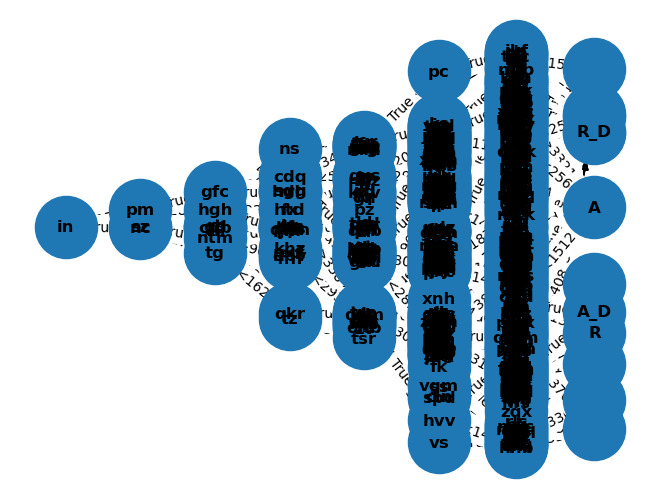

In [10]:
drow_graph(my_G)    

In [11]:
def convert_string_to_dict(string):
    xmas = string[1:-1].split(',')
    result_dict = {}
    for pair in xmas:
        key, value = pair.split('=')
        result_dict[key.strip()] = int(value.strip())
    return result_dict

In [12]:
parts = input_data[1].strip().split('\n')

In [13]:
convert_string_to_dict(parts[0])

{'x': 530, 'm': 634, 'a': 3725, 's': 1229}

In [16]:
part_features = {}
list_out = []
count = 0
A, R = 0,0
for part in parts:
    temp_dic = convert_string_to_dict(part)
    if graph_walk(my_G, temp_dic)[0] == 'A':
        A+=1
        list_out.append(part)
        count+=sum(temp_dic.values())

In [19]:
count

406934

## Task 2

In [20]:
input_data = open('Day_19_data/input.txt', "r").read().split('\n\n')

In [22]:
# create dictionary with nodes and rules
rules_dic = {}
for line in input_data[0].split('\n'):
    line = line.strip()
    current_node = line.split('{')[0]
    rules = line.split('{')[1]
    rules_dic[current_node] = rules[:-1].split(',')

In [24]:
def neg_rule(rule_string: str) -> str:
    new_rule = ''
    if '>' in rule_string:
        var, number = rule_string.split('>')
        new_rule = f'{var}<{int(number)+1}'
    else:
        var, number = rule_string.split('<')
        new_rule = f'{var}>{int(number)-1}'
    return new_rule

In [25]:
def add_neg_rules_to_dic(rule: str):
    temp_dic = []
    prev_rule = []
    for i in rule:
        node = i.split(':')
        if len(node) > 1:
            new_el = [node[1], list(map(neg_rule, prev_rule)) + [node[0]]]
            temp_dic.append([node[1], list(map(neg_rule, prev_rule)) + [node[0]]])
            prev_rule = prev_rule +[node[0]]
        else:
            temp_dic.append([node[0], list(map(neg_rule, prev_rule))])
    return temp_dic

In [26]:
full_rules_dic = {}
for k,v in rules_dic.items():
    new_rules = add_neg_rules_to_dic(v)
    full_rules_dic[k] = new_rules

In [30]:
def dfs(rules_dic, current_node, target_node, path=[], 
        all_path = [], current_rule=[], rule_list = [], 
        full_rule_list = []):
    path = path + [current_node]
    rule_list = rule_list + current_rule
        
    if current_node == target_node:
        full_rule_list.append(rule_list)
        all_path.append(path)
        return
    
    if current_node not in list(rules_dic.keys()):
        return
    
    for node in rules_dic[current_node]:
        if node[0] not in path:
            dfs(rules_dic, node[0], target_node, path, all_path, node[1], rule_list, full_rule_list)
        

In [31]:
all_paths = []
all_rules = []
dfs(full_rules_dic, 'in', 'A', [], all_paths, [], [], all_rules)

In [35]:
def list_of_rules(rule_list):
    my_dic = {'x':[0, 4000], 'm':[0, 4000], 'a':[0, 4000], 's':[0, 4000]}
    for rule in rule_list:
        #print(rule)
        if '<' in rule:
            my_dic[rule[0]][1] = min((int(rule.split('<')[1])-1), my_dic[rule[0]][1])
        else:
            #print(int(rule.split('>')[1]))
            my_dic[rule[0]][0] = max((int(rule.split('>')[1])), my_dic[rule[0]][0])
    output_list = []
    count = 1
    for k,v in my_dic.items():
        #print(v[1] - v[0])
        count = count*(v[1] - (v[0]))
        output_list.append([v[1], v[0]])
    return count


In [36]:
sum_all = 0
qqq = []
for i in all_rules:
    l = list_of_rules(i)
    qqq.append(l)
    sum_all+=l

In [37]:
sum_all

131192538505367

# Day 12

## Task 1

In [44]:
import re
from typing import Tuple, List

In [45]:
input_data = open('Day_12_data/input.txt', "r").read().split('\n')

In [46]:
def create_new_string(input_string: str, number: int) -> Tuple[str, List[int]]:
    input_string, pattern_numbers = input_string.split(' ')
    input_string = '?'.join([input_string] * number)
    pattern_numbers = list(map(int, pattern_numbers.split(',')))
    pattern_numbers = pattern_numbers*number
    #print(pattern_string)
    return input_string, pattern_numbers

In [47]:
def count_hashes(input_string: str) -> int:
    pattern = re.compile(r'#+')
    return [len(match.group()) for match in pattern.finditer(input_string)]

def recursion_combi(pattern, index, string, count=[]):
    if index==len(string):
        if count_hashes(string)==pattern:
            count.append(1)
        return
    
    if string[index]=='?':
        recursion_combi(pattern, index+1, string.replace('?', '#', 1), count)
        recursion_combi(pattern, index+1, string.replace('?', '.', 1), count)
    else:
        recursion_combi(pattern, index+1, string, count)    

In [49]:
%%time
count = 0
combo_list_1 = []
combo_list_2 = []
for input_string in input_data:
    input_string_parse, pattern_string = create_new_string(input_string,1)
    all_combo = []
    input_string_parse = input_string_parse
    recursion_combi(pattern_string, 0, input_string_parse, all_combo)
    combo_list_1.append(len(all_combo))
    
sum(combo_list_1)

CPU times: total: 21.7 s
Wall time: 22.2 s


7032

## Task 2

In [51]:
from itertools import product

In [52]:
input_data = open('Day_12_data/input.txt', "r").read().split('\n')

In [53]:
def count_hashes(input_string: str) -> int:
    pattern = re.compile(r'#+')
    return [len(match.group()) for match in pattern.finditer(input_string)]

In [54]:
def create_new_string(input_string: str, number: int) -> Tuple[str, int]:
    input_string, pattern_numbers = input_string.split(' ')
    input_string = '?'.join([input_string] * number)
    pattern_numbers = list(map(int, pattern_numbers.split(',')))
    pattern_numbers = pattern_numbers*number
    #print(pattern_string)
    return input_string, pattern_numbers

In [ ]:
replacements = ['.', '#']
result = []
i=0
for input_string in input_data:
    print(i)
    i+=1
    input_string_parse, pattern_string = create_new_string(input_string,2)
    diff = sum(pattern_string) - input_string_parse.count('#')
    combinations = list(product(replacements, repeat=input_string_parse.count('?')))
    count = 0
    for combo in combinations:
        if combo.count('#') == diff:
            new_str = input_string_parse.replace('?', '{}').format(*combo)
            if count_hashes(new_str)==pattern_string:
                count+=1
    result.append(count)

0
1


## Task 3

In [4]:
import re
from typing import Tuple, List

In [5]:
input_data = open('Day_12_data/input.txt', "r").read().split('\n')

In [6]:
def create_new_string(input_string: str, number: int) -> Tuple[str, List[int]]:
    input_string, pattern_numbers = input_string.split(' ')
    short_string = re.sub(r'\.{2,}', '.', input_string)
    short_string = '?'.join([short_string] * number)
    pattern_numbers = list(map(int, pattern_numbers.split(',')))
    pattern_numbers = pattern_numbers*number
    #print(pattern_string)
    return short_string, pattern_numbers

In [7]:
def count_hashes(input_string: str) -> int:
    pattern = re.compile(r'#+')
    return [len(match.group()) for match in pattern.finditer(input_string)]

In [8]:
from functools import cache
@cache
def recursion_combi(input_string: str, pattern: Tuple[int, ...]) -> int:
    #print(input_string, pattern)
    if not input_string:
        return len(pattern) == 0

    if not pattern:
        return "#" not in input_string

    char, string_rest = input_string[0], input_string[1:]
    
    if char == '.':
        return recursion_combi(string_rest, pattern)
    
    if char == '#':
        current_p = pattern[0]
        if (
            # long enough to match
            len(input_string) >= current_p
            # made of only things that can be `#` (no `.`)
            and all(c != "." for c in input_string[:current_p])
            # either at the end of the record (allowed)
            # or the next character isn't also a `#` (would be too big)
            and (len(input_string) == current_p or input_string[current_p] != "#")
        ):
            return recursion_combi(input_string[current_p+1:], pattern[1:])
        return 0
    if char == '?':
        return recursion_combi(f'#{string_rest}', pattern) + recursion_combi(f'.{string_rest}', pattern)

In [9]:
def combo_split(pattern_string: str, input_string: str) -> Tuple[str, str]:
    #print(input_string, pattern_string)
    string_groups = input_string.split('.')

    string_length = [len(i) for i in string_groups]
    #print(string_groups, string_length)
    #for i in range(min(len(pattern_string), len(string_length))):
    flag=True
    while flag:
        #print('input_string', input_string, pattern_string)    
        if pattern_string[0]>string_length[0]:
            #print('IF1: ', pattern_string, string_length)
            len_group = string_length.pop(0)
            input_string = input_string[len_group+1:]
                #input_string = input_string[len_group+1:]
        elif pattern_string[-1]>string_length[-1]:
            #print('IF2: ', pattern_string, string_length)         
            len_group = string_length.pop()
            input_string = input_string[:-len_group-1]
                #input_string = input_string[:-len_group-1]
        elif len(string_length)>=2:
            #print('IF4: ', pattern_string, string_length)      
            if pattern_string[-1]==string_length[-1] and pattern_string[-1]>string_length[-2]:
                pattern_string.pop()
                len_group = string_length.pop()
                input_string = input_string[:-len_group-1]
                #print('IF5: ', pattern_string, string_length)  
            elif pattern_string[0]==string_length[0] and pattern_string[0]>string_length[1]:
                pattern_string.pop(0)
                len_group = string_length.pop(0)
                input_string = input_string[len_group+1:]
                #print('IF6: ', pattern_string, string_length)  
            else:
                #print('IF7: ', pattern_string, string_length)      
                break           
        else:
            flag=False
    flag=True
    

    #print('EN:', string_groups, string_length, input_string)
    return pattern_string, input_string

In [10]:
%%time
count = 0
combo_list_1 = []
combo_list_2 = []
i=0
for input_string in input_data:
    i+=1
    flag = True
    group_flag_start, group_flag_end = True, True
    group_flag = True
    count = 0
    input_string_parse, pattern_string = create_new_string(input_string,5)
    all_combo = []
    input_string_parse = input_string_parse
    while flag and input_string_parse and pattern_string and group_flag:
        if len(input_string_parse)==(sum(pattern_string)+len(pattern_string)-1):
            count=1
            break     
        input_string_parse = input_string_parse.strip('.')
        if input_string_parse[0] == '#':
            count_hash = pattern_string.pop(0)
            input_string_parse=input_string_parse[count_hash+1:]
        elif input_string_parse[-1] == '#':  
            count_hash = pattern_string.pop()
            input_string_parse=input_string_parse[:-count_hash-1]
        elif input_string_parse.find('.')==pattern_string[0] and group_flag_start:          
            count_hash = pattern_string[0]
            if len(input_string_parse[count_hash+1:])<sum(pattern_string):
                pattern_string.pop(0)
                input_string_parse=input_string_parse[count_hash+1:]    
            else:                
                group_flag_start = False
        elif (len(input_string_parse) - input_string_parse.rfind('.') - 1)==pattern_string[-1] and group_flag_end:
            count_hash = pattern_string[-1]
            if len(input_string_parse[:-count_hash-1])<sum(pattern_string):
                pattern_string.pop()
                input_string_parse=input_string_parse[:-count_hash-1]
            else:
                group_flag_end = False      
        
        else:
            flag=False   
    if count==1 or not pattern_string:
        combo_list_1.append(1)
    else:
        pattern_string, input_string_parse = combo_split(pattern_string, input_string_parse)
        combo_list_1.append(recursion_combi(input_string_parse, tuple(pattern_string)))
    
    #recursion_combi(pattern_string, 0, input_string_parse, all_combo)
    
    #input_string_parse, pattern_string = create_new_string(input_string,2)
    #all_combo_2 = []
    #recursion_combi(pattern_string, 0, input_string_parse, all_combo_2)
    #combo_list_2.append(len(all_combo_2))
    
sum(combo_list_1)

CPU times: total: 1.23 s
Wall time: 1.32 s


1493340882140

In [12]:
sum(combo_list_1)

1493340882140

# Day 21

In [15]:
delta = [[-1, 0],  # go up
         [0, -1],  # go left
         [1, 0],  # go down
         [0, 1]
        ]  # go right

input_data = open('Day_21_data/test_1.txt', "r").read().split('\n')
input_matrix = [list(i) for i in input_data]

In [16]:
input_matrix = [list(i) for i in input_data]

In [17]:
m, n = 0,0
for i in range(len(input_data)):
    if 'S' in input_data[i]:
        m,n=i,input_data[i].find('S')

In [18]:
 def lakes_map(list_of_lakes, all_map):
    new_list_of_lakes = []    
    for lake in list_of_lakes:
        for direction in delta:
            new_m = lake[0] + direction[0]
            new_n = lake[1] + direction[1]
            if (all_map[new_m][new_n]!='#') and ([new_m, new_n] not in new_list_of_lakes) \
            and (0<=new_m<(len(all_map) -1)and 0<=new_n<(len(all_map)-1)):
                new_list_of_lakes.append([new_m, new_n])
    return new_list_of_lakes
            
#lakes_map(list_of_lakes, input_matrix)

In [19]:
steps_num = 48
list_of_lakes = [[m,n]]
for i in range(steps_num):
    list_of_lakes = lakes_map(list_of_lakes, input_matrix)
print(len(list_of_lakes) + steps_num%2)

29
